In [ ]:
import numpy as np


In [ ]:
import numpy as np

# Define the system of equations as functions
def f(x, k1, k2, k3, k4):
    f1 = -x[0] + 10.0 + 2 * (-k1 * x[0] - k2 * x[1]**1.5 + k3 * x[2]**2)
    f2 = -x[1] + 2 * (2 * k1 * x[0] - k4 * x[1]**2)
    f3 = -x[2] + 2 * (k2 * x[0]**1.5 + k4 * x[1]**2 - k3 * x[2]**2)
    f4 = -x[3] + 2 * k4 * x[1]**2
    return np.array([f1, f2, f3, f4])

# Define the Jacobian matrix
def jacobian(x, k1, k2, k3, k4):
    jacobian_matrix = np.zeros((4, 4))
    jacobian_matrix[0, 0] = -1 - 2 * (k1 + k3 * x[2]**2)
    jacobian_matrix[0, 1] = -10 * k2 * x[1]**4
    jacobian_matrix[0, 2] = 4 * k3 * x[0] * x[2]
    jacobian_matrix[0, 3] = 0  # Added missing entry

    jacobian_matrix[1, 0] = 4 * k1
    jacobian_matrix[1, 1] = -1 - 4 * k4 * x[1]
    jacobian_matrix[1, 2] = 0  # Added missing entry
    jacobian_matrix[1, 3] = 0  # Added missing entry

    jacobian_matrix[2, 0] = 5 * k2 * x[0]**4
    jacobian_matrix[2, 1] = 4 * k4 * x[1]
    jacobian_matrix[2, 2] = -1 - 4 * k3 * x[2]
    jacobian_matrix[2, 3] = 0  # Added missing entry

    jacobian_matrix[3, 0] = 0  # Added missing entry
    jacobian_matrix[3, 1] = -4 * k4 * x[1]
    jacobian_matrix[3, 2] = 0  # Added missing entry
    jacobian_matrix[3, 3] = 0  # Added missing entry

    return jacobian_matrix

# Newton-Raphson solver function
def newton_raphson_solver(initial_guess, k_values, tol=1e-4, max_iter=1000):
    x = np.array(initial_guess, dtype=float)
    for iteration in range(max_iter):
        residual = f(x, *k_values)
        jac = jacobian(x, *k_values)
        delta_x, _, _, _ = np.linalg.lstsq(jac, -residual, rcond=None)
        x += delta_x
        if np.max(np.abs(delta_x)) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return x
        print(f"Iteration {iteration + 1}: x = {x}, Residuals = {residual}")
    print("Iterations did not converge.")
    return None

# Define the parameters and initial guess
k_values = (1.0, 0.2, 0.05, 0.4)
initial_guess = [0.3, 0.7, 0.5, 0.49]  # Use your provided values

# Call the Newton-Raphson solver
result = newton_raphson_solver(initial_guess, k_values)

# Print the converged values of x1, x2, x3, and x4
if result is not None:
    x1, x2, x3, x4 = result
    print(f"Converged values: x1 = {x1}, x2 = {x2}, x3 = {x3}, x4 = {x4}")



Iteration 1: x = [2.18653023 3.64865429 3.40900101 0.49      ], Residuals = [ 8.89073519  0.108      -0.06727329 -0.098     ]
Iteration 2: x = [ 3.92862043  3.7537408  31.92517945  0.49      ], Residuals = [ 1.81475446 -5.55267589  7.37229468 10.16014252]
Iteration 3: x = [ 5.05328495  5.03643683 53.0594515   0.49      ], Residuals = [  97.22676195    0.68828494 -119.45970393   10.78245599]
Iteration 4: x = [ 6.00606818  6.18801825 80.68022204  0.49      ], Residuals = [ 271.84957442   -5.11585381 -309.75361869   19.80255678]
Iteration 5: x = [  6.96538143   7.27885565 113.59026503   0.49      ], Residuals = [ 636.75436001  -12.79700139 -695.08909299   30.14325585]
Iteration 6: x = [  7.90397131   8.31973742 150.15490288   0.49      ], Residuals = [ 1271.52353363   -21.8027216  -1354.12648794    41.89539168]
Iteration 7: x = [  8.81583426   9.32090767 189.84423825   0.49      ], Residuals = [ 2231.33860658   -32.07827677 -2340.54147334    54.8844246 ]
Iteration 8: x = [  9.70324925  10

In [ ]:
import numpy as np

def newton_raphson(f, x0, eps=1e-4, max_iter=50):
    n = len(x0)
    x = x0.copy()
    omega = 1.0

    for _ in range(max_iter):
        y = np.array(f(*x))

        # Compute the Jacobian matrix numerically using finite differences
        J = np.zeros((n, n))
        for i in range(n):
            x_perturbed = x.copy()
            x_perturbed[i] *= 1.002
            y_perturbed = np.array(f(*x_perturbed))
            J[:, i] = (y_perturbed - y) / (0.002 * x[i])

        b = -y

        # Solve the linear system JΔx = b using numpy's linear solver
        dx = np.linalg.solve(J, b)

        # Update the guess
        x = x + omega * dx

        # Estimate the maximum value of dxmax
        dxmax = np.max(np.abs(dx))

        print(f'Iteration No {_+1}, dxmax = {dxmax}')

        if dxmax < eps:
            print("Converged to the following solution:")
            for i in range(n):
                print(f'x[{i+1}] = {x[i]}')
            return x

    print("Iterations did not converge.")
    return None

# Define your system of equations as a list of functions
def equations(x1, x2, x3, x4, x5):
    eq1 = -x1 + x2 + 2 * (-1.0 * x1 - 0.2 * x1 * x5 + 0.05 * x3 * x3)
    eq2 = -x2 + 2 * (2 * 1.0 * x1 - 0.4 * x2 * x2)
    eq3 = -x3 + 2 * (0.2 * x1 * x5 + 0.4 * x2 * x2 - 0.05 * x3 * x3)
    eq4 = -x4 + 2 * (0.4 * x2 * x2)

    return eq1, eq2, eq3, eq4

# Initial guess
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Call the Newton-Raphson solver
solution = newton_raphson(equations, initial_guess)


ValueError: ignored

In [ ]:
import numpy as np

# Define the system of equations as functions
def equations(x):
    x1, x2, x3, x4, x5 = x
    f1 = -x1 + x2 + 2 * (-1.0 * x1 - 0.2 * x1 * x5 + 0.05 * x3 * x3)
    f2 = -x2 + 2 * (2 * 1.0 * x1 - 0.4 * x2 * x2)
    f3 = -x3 + 2 * (0.2 * x1 * x5 + 0.4 * x2 * x2 - 0.05 * x3 * x3)
    f4 = -x4 + 2 * (0.4 * x2 * x2)
    f5 = -x5 + 2 * (0.1 * x3 * x3)

    return np.array([f1, f2, f3, f4, f5])

# Define the Jacobian matrix
def jacobian(x):
    x1, x2, x3, x4, x5 = x
    jacobian_matrix = np.zeros((5, 5))

    jacobian_matrix[0, 0] = -1 - 2 * (-1.0 - 0.2 * x5)
    jacobian_matrix[0, 1] = 1
    jacobian_matrix[0, 2] = 0.1 * x3**2
    jacobian_matrix[0, 3] = 0
    jacobian_matrix[0, 4] = -0.2 * x1

    jacobian_matrix[1, 0] = 4 * 1.0
    jacobian_matrix[1, 1] = -1 - 4 * 0.4 * x2
    jacobian_matrix[1, 2] = 0
    jacobian_matrix[1, 3] = 0
    jacobian_matrix[1, 4] = 0

    jacobian_matrix[2, 0] = 0.1 * x5
    jacobian_matrix[2, 1] = 0.8 * x2
    jacobian_matrix[2, 2] = -1 - 0.1 * x3**2
    jacobian_matrix[2, 3] = 0
    jacobian_matrix[2, 4] = 0.2 * x1

    jacobian_matrix[3, 0] = 0
    jacobian_matrix[3, 1] = -0.8 * x2
    jacobian_matrix[3, 2] = 0
    jacobian_matrix[3, 3] = -1
    jacobian_matrix[3, 4] = 0

    jacobian_matrix[4, 0] = 0
    jacobian_matrix[4, 1] = 0
    jacobian_matrix[4, 2] = 0.2 * x3
    jacobian_matrix[4, 3] = 0
    jacobian_matrix[4, 4] = -1

    return jacobian_matrix

# Newton-Raphson solver function
def newton_raphson_solver(initial_guess, tol=1e-1, max_iter=50):
    x = np.array(initial_guess, dtype=float)

    for iteration in range(max_iter):
        residual = equations(x)
        jac = jacobian(x)
        delta_x = np.linalg.solve(jac, -residual)
        x += delta_x

        dxmax = np.max(np.abs(delta_x))
        print(f'Iteration {iteration + 1}, dxmax = {dxmax}')

        if dxmax < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return x

    print("Iterations did not converge.")
    return None

# Initial guess
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Call the Newton-Raphson solver
solution = newton_raphson_solver(initial_guess)

# Print the converged values
if solution is not None:
    print(f"Converged values: x = {solution}")


Iteration 1, dxmax = 1.488803274741151
Iteration 2, dxmax = 5.016714225606802
Iteration 3, dxmax = 3.1634396225907553
Iteration 4, dxmax = 3.904002797141739
Iteration 5, dxmax = 7.6183585391645146
Iteration 6, dxmax = 11.665766994296703
Iteration 7, dxmax = 17.796026543065423
Iteration 8, dxmax = 25.40055582136161
Iteration 9, dxmax = 34.69812398426044
Iteration 10, dxmax = 45.49801854229094
Iteration 11, dxmax = 57.68640038737747
Iteration 12, dxmax = 71.12315223992744
Iteration 13, dxmax = 85.68456082228592
Iteration 14, dxmax = 101.26054251377052
Iteration 15, dxmax = 117.75575021529025
Iteration 16, dxmax = 135.08797054041347
Iteration 17, dxmax = 153.18632937080764
Iteration 18, dxmax = 171.98952978970752
Iteration 19, dxmax = 191.44430339956412
Iteration 20, dxmax = 211.50410348526452
Iteration 21, dxmax = 232.12802369635452
Iteration 22, dxmax = 253.27991040472068
Iteration 23, dxmax = 274.92763534754084
Iteration 24, dxmax = 297.04249861780033
Iteration 25, dxmax = 319.59873687

In [ ]:
import numpy as np

# Define the system of equations as functions
def equations(x):
    x1, x2, x3, x4 = x
    f1 = 1.0 * x1 - 2.0 * x2 + 3.0 * x3 - 4.0 * x4 + 1.0
    f2 = 4.0 * x1 - 3.0 * x2 + 2.0 * x3 - 1.0 * x4 - 2.0
    f3 = -2.0 * x1 + 1.0 * x2 + 4.0 * x3 - 3.0 * x4 + 3.0
    f4 = 3.0 * x1 - 4.0 * x2 - 1.0 * x3 + 2.0 * x4 - 4.0

    return np.array([f1, f2, f3, f4])

# Define the Jacobian matrix
def jacobian(x):
    x1, x2, x3, x4 = x
    jacobian_matrix = np.zeros((4, 4))

    jacobian_matrix[0, 0] = 1.0
    jacobian_matrix[0, 1] = -2.0
    jacobian_matrix[0, 2] = 3.0
    jacobian_matrix[0, 3] = -4.0

    jacobian_matrix[1, 0] = 4.0
    jacobian_matrix[1, 1] = -3.0
    jacobian_matrix[1, 2] = 2.0
    jacobian_matrix[1, 3] = -1.0

    jacobian_matrix[2, 0] = -2.0
    jacobian_matrix[2, 1] = 1.0
    jacobian_matrix[2, 2] = 4.0
    jacobian_matrix[2, 3] = -3.0

    jacobian_matrix[3, 0] = 3.0
    jacobian_matrix[3, 1] = -4.0
    jacobian_matrix[3, 2] = -1.0
    jacobian_matrix[3, 3] = 2.0

    return jacobian_matrix

# Newton-Raphson solver function
def newton_raphson_solver(initial_guess, tol=1e-50, max_iter=50000):
    x = np.array(initial_guess, dtype=float)
    residuals = []  # To store residuals at each iteration

    for iteration in range(max_iter):
        residual = equations(x)
        residuals.append(residual)
        jac = jacobian(x)
        delta_x = np.linalg.solve(jac, -residual)
        x += delta_x

        dxmax = np.max(np.abs(delta_x))
        print(f'Iteration {iteration + 1}, dxmax = {dxmax}')

        if dxmax < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return x, residuals

    print("Iterations did not converge.")
    return None, residuals

# Initial guess
initial_guess = [3.1886E-001, 7.83883E-001, 5.34981E-001, 4.9158E-001]

# Call the Newton-Raphson solver
solution, residuals = newton_raphson_solver(initial_guess)

# Print the converged values and residuals
if solution is not None:
    print(f"Converged values: x1 = {solution[0]}, x2 = {solution[1]}, x3 = {solution[2]}, x4 = {solution[3]}")
    print("Residuals at each iteration:")
    for i, residual in enumerate(residuals):
        print(f"Iteration {i + 1}: {residual}")


Streaming output truncated to the last 5000 lines.
Iteration 45002, dxmax = 2.220446049250313e-16
Iteration 45003, dxmax = 2.220446049250313e-16
Iteration 45004, dxmax = 2.220446049250313e-16
Iteration 45005, dxmax = 2.220446049250313e-16
Iteration 45006, dxmax = 2.220446049250313e-16
Iteration 45007, dxmax = 2.220446049250313e-16
Iteration 45008, dxmax = 2.220446049250313e-16
Iteration 45009, dxmax = 2.220446049250313e-16
Iteration 45010, dxmax = 2.220446049250313e-16
Iteration 45011, dxmax = 2.220446049250313e-16
Iteration 45012, dxmax = 2.220446049250313e-16
Iteration 45013, dxmax = 2.220446049250313e-16
Iteration 45014, dxmax = 2.220446049250313e-16
Iteration 45015, dxmax = 2.220446049250313e-16
Iteration 45016, dxmax = 2.220446049250313e-16
Iteration 45017, dxmax = 2.220446049250313e-16
Iteration 45018, dxmax = 2.220446049250313e-16
Iteration 45019, dxmax = 2.220446049250313e-16
Iteration 45020, dxmax = 2.220446049250313e-16
Iteration 45021, dxmax = 2.220446049250313e-16
Iteration

In [ ]:
import numpy as np

# Define the system of equations as functions
def equations(x):
    x1, x2, x3, x4 = x
    f1 = 1.0 * x1 - 2.0 * x2 + 3.0 * x3 - 4.0 * x4 + 1.0
    f2 = 4.0 * x1 - 3.0 * x2 + 2.0 * x3 - 1.0 * x4 - 2.0
    f3 = -2.0 * x1 + 1.0 * x2 + 4.0 * x3 - 3.0 * x4 + 3.0
    f4 = 3.0 * x1 - 4.0 * x2 - 1.0 * x3 + 2.0 * x4 - 4.0

    return np.array([f1, f2, f3, f4])

# Define the Jacobian matrix
def jacobian(x):
    x1, x2, x3, x4 = x
    jacobian_matrix = np.zeros((4, 4))

    jacobian_matrix[0, 0] = 1.0
    jacobian_matrix[0, 1] = -2.0
    jacobian_matrix[0, 2] = 3.0
    jacobian_matrix[0, 3] = -4.0

    jacobian_matrix[1, 0] = 4.0
    jacobian_matrix[1, 1] = -3.0
    jacobian_matrix[1, 2] = 2.0
    jacobian_matrix[1, 3] = -1.0

    jacobian_matrix[2, 0] = -2.0
    jacobian_matrix[2, 1] = 1.0
    jacobian_matrix[2, 2] = 4.0
    jacobian_matrix[2, 3] = -3.0

    jacobian_matrix[3, 0] = 3.0
    jacobian_matrix[3, 1] = -4.0
    jacobian_matrix[3, 2] = -1.0
    jacobian_matrix[3, 3] = 2.0

    return jacobian_matrix

# Newton-Raphson solver function
def newton_raphson_solver(initial_guess, tol=1e-4, max_iter=50):
    x = np.array(initial_guess, dtype=float)
    residuals = []  # To store residuals at each iteration

    for iteration in range(max_iter):
        residual = equations(x)
        residuals.append(residual)
        jac = jacobian(x)
        delta_x = np.linalg.solve(jac, -residual)
        x += delta_x

        dxmax = np.max(np.abs(delta_x))
        print(f'Iteration {iteration + 1}, dxmax = {dxmax}')

        if dxmax < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return x, residuals

    print("Iterations did not converge.")
    return None, residuals

# Initial guess
initial_guess = [3.1886E-001, 7.83883E-001, 5.34981E-001, 4.9158E-001]

# Call the Newton-Raphson solver
solution, residuals = newton_raphson_solver(initial_guess)

# Print the converged values and residuals
if solution is not None:
    print(f"Converged values: x1 = {solution[0]}, x2 = {solution[1]}, x3 = {solution[2]}, x4 = {solution[3]}")
    print("Residuals at each iteration:")
    for i, residual in enumerate(residuals):
        print(f"Iteration {i + 1}: {residual}")


Iteration 1, dxmax = 1.2838830000000006
Iteration 2, dxmax = 3.9968028886505636e-16
Converged after 2 iterations.
Converged values: x1 = 0.2999999999999998, x2 = -0.5000000000000002, x3 = -0.1, x4 = 0.5000000000000001
Residuals at each iteration:
Iteration 1: [-0.610283 -2.497827  3.811347 -5.730773]
Iteration 2: [ 4.4408921e-16 -4.4408921e-16  8.8817842e-16  0.0000000e+00]


In [ ]:
import numpy as np

# Define the system of equations as functions
def equations(x, k1, k2, k3, k4):
    x1, x2, x3, x4 = x
    f1 = -x1 + 1.0 + 2 * (-k1 * x1 - k2 * x1**5 + k3 * x3**2)
    f2 = -x2 + 2 * (2 * k1 * x1 - k4 * x2**2)
    f3 = -x3 + 2 * (k2 * x1**5 + k4 * x2**2 - k3 * x3**2)
    f4 = -x4 + 2 * (k4 * x2**2)

    return np.array([f1, f2, f3, f4])

# Define the Jacobian matrix
def jacobian(x, k1, k2, k3, k4):
    x1, x2, x3, x4 = x
    jacobian_matrix = np.zeros((4, 4))

    jacobian_matrix[0, 0] = -1 - 2 * (-k1 - 5 * k2 * x1**4)
    jacobian_matrix[0, 1] = 0
    jacobian_matrix[0, 2] = 4 * k3 * x3
    jacobian_matrix[0, 3] = 0

    jacobian_matrix[1, 0] = 4 * k1
    jacobian_matrix[1, 1] = -1 - 4 * k4 * x2
    jacobian_matrix[1, 2] = 0
    jacobian_matrix[1, 3] = 0

    jacobian_matrix[2, 0] = 5 * k2 * x1**4
    jacobian_matrix[2, 1] = 4 * k4 * x2
    jacobian_matrix[2, 2] = -1 - 2 * k3 * x3
    jacobian_matrix[2, 3] = 0

    jacobian_matrix[3, 0] = 0
    jacobian_matrix[3, 1] = -4 * k4 * x2
    jacobian_matrix[3, 2] = 0
    jacobian_matrix[3, 3] = -1

    return jacobian_matrix

# Newton-Raphson solver function
def newton_raphson_solver(initial_guess, k_values, tol=1e-4, max_iter=5000):
    x = np.array(initial_guess, dtype=float)
    residuals = []  # To store residuals at each iteration

    for iteration in range(max_iter):
        residual = equations(x, *k_values)
        residuals.append(residual)
        jac = jacobian(x, *k_values)
        delta_x = np.linalg.solve(jac, -residual)
        x += delta_x

        dxmax = np.max(np.abs(delta_x))
        print(f'Iteration {iteration + 1}, dxmax = {dxmax}')

        if dxmax < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return x, residuals

    print("Iterations did not converge.")
    return None, residuals

# Initial guess
initial_guess = [3.1886E-001, 7.83883E-001, 5.34981E-001, 4.9158E-001] # Assuming x4 = 1.0 initially

# Values of k1, k2, k3, and k4
k_values = [0.1,0.02, 0.5,0.6]  # You can adjust these values as needed

# Call the Newton-Raphson solver
solution, residuals = newton_raphson_solver(initial_guess, k_values)

# Print the converged values and residuals
if solution is not None:
    print(f"Converged values: x1 = {solution[0]}, x2 = {solution[1]}, x3 = {solution[2]}, x4 = {solution[3]}")
    print("Residuals at each iteration:")
    for i, residual in enumerate(residuals):
        print(f"Iteration {i + 1}: {residual}")


Iteration 1, dxmax = 1.0662960120762992
Iteration 2, dxmax = 1.3536708442154848
Iteration 3, dxmax = 0.16506855408204296
Iteration 4, dxmax = 0.14639330356474384
Iteration 5, dxmax = 0.1235225802407174
Iteration 6, dxmax = 0.10839135401526619
Iteration 7, dxmax = 0.09188280886670959
Iteration 8, dxmax = 0.08021113850706285
Iteration 9, dxmax = 0.06823950066335376
Iteration 10, dxmax = 0.05934537773022005
Iteration 11, dxmax = 0.05063022266586696
Iteration 12, dxmax = 0.043908418402449495
Iteration 13, dxmax = 0.037541057003106275
Iteration 14, dxmax = 0.03249022287432908
Iteration 15, dxmax = 0.027823985927717457
Iteration 16, dxmax = 0.02404416371842259
Iteration 17, dxmax = 0.020616171206986177
Iteration 18, dxmax = 0.017795718559175246
Iteration 19, dxmax = 0.015272542358261995
Iteration 20, dxmax = 0.013172343939292763
Iteration 21, dxmax = 0.0113124099748479
Iteration 22, dxmax = 0.009750893582486347
Iteration 23, dxmax = 0.008378318818128906
Iteration 24, dxmax = 0.00721859067252

In [ ]:
import numpy as np

# Define the Lagrange interpolation function
def lagrange_interpolation(x, y, xx):
    n = len(x)
    yy = np.zeros(3)
    for i in range(3):
        prod = y[i]
        for j in range(3):
            if i != j:
                prod *= (xx - x[j]) / (x[i] - x[j])
        yy[i] = prod
    return np.sum(yy)

# Read the number of data points
N = int(input("Enter the number of data points: "))

# Read the data points (x, y)
x = np.zeros(N)
y = np.zeros(N)

for i in range(N):
    x[i], y[i] = map(float, input(f"Enter x[{i}]: "), input(f"Enter y[{i}]: "))

# Define the values of x where you want to estimate y
x_values = [0.05, 0.25, 0.55, 0.75, 0.95]

# Perform Lagrange interpolation and estimate y for each x value
for xx in x_values:
    ii = 0
    for i in range(N):
        if x[i] >= xx:
            ii = i
            break

    if ii == 0 or ii == 1:
        print(f"x = {xx} is out of range.")
    elif ii == 2:
        yy = [y[ii - 1], y[ii], y[ii + 1]]
        xx_values = [x[ii - 1], x[ii], x[ii + 1]]
        interpolated_y = lagrange_interpolation(xx_values, yy, xx)
        print(f"At x = {xx}, interpolated y = {interpolated_y}")
    else:
        yy = [y[ii], y[ii - 1], y[ii - 2]]
        xx_values = [x[ii], x[ii - 1], x[ii - 2]]
        interpolated_y = lagrange_interpolation(xx_values, yy, xx)
        print(f"At x = {xx}, interpolated y = {interpolated_y}")


Enter the number of data points: 5
Enter x[0]: 1
Enter y[0]: 1


TypeError: ignored

In [ ]:
import numpy as np

# Define the Lagrange interpolation function
def lagrange_interpolation(x, y, xx):
    n = len(x)
    yy = np.zeros(3)
    for i in range(3):
        prod = y[i]
        for j in range(3):
            if i != j:
                prod *= (xx - x[j]) / (x[i] - x[j])
        yy[i] = prod
    return np.sum(yy)

# Read the number of data points
N = int(input("Enter the number of data points: "))

# Initialize arrays for x and y
x = np.zeros(N)
y = np.zeros(N)

# Read the data points (x, y)
for i in range(N):
    x[i] = float(input(f"Enter x[{i}]: "))
    y[i] = float(input(f"Enter y[{i}]: "))

# Define the values of x where you want to estimate y
x_values = [0.05, 0.25, 0.55, 0.75, 0.95]

# Perform Lagrange interpolation and estimate y for each x value
for xx in x_values:
    ii = 0
    for i in range(N):
        if x[i] >= xx:
            ii = i
            break

    if ii == 0 or ii == 1:
        print(f"x = {xx} is out of range.")
    elif ii == 2:
        yy = [y[ii - 1], y[ii], y[ii + 1]]
        xx_values = [x[ii - 1], x[ii], x[ii + 1]]
        interpolated_y = lagrange_interpolation(xx_values, yy, xx)
        print(f"At x = {xx}, interpolated y = {interpolated_y}")
    else:
        yy = [y[ii], y[ii - 1], y[ii - 2]]
        xx_values = [x[ii], x[ii - 1], x[ii - 2]]
        interpolated_y = lagrange_interpolation(xx_values, yy, xx)
        print(f"At x = {xx}, interpolated y = {interpolated_y}")


Enter the number of data points: 3
Enter x[0]: -2
Enter y[0]: -3
Enter x[1]: 0
Enter y[1]: 1
Enter x[2]: 2
Enter y[2]: 3


IndexError: ignored

In [ ]:
import numpy as np

# Define the Lagrange interpolation function
def lagrange_interpolation(x, y, xx):
    n = len(x)
    yy = np.zeros(3)
    for i in range(3):
        prod = y[i]
        for j in range(3):
            if i != j:
                prod *= (xx - x[j]) / (x[i] - x[j])
        yy[i] = prod
    return np.sum(yy)

# Read the number of data points
N = int(input("Enter the number of data points: "))

# Initialize arrays for x and y
x = np.zeros(N)
y = np.zeros(N)

# Read the data points (x, y)
for i in range(N):
    x[i] = float(input(f"Enter x[{i}]: "))
    y[i] = float(input(f"Enter y[{i}]: "))

# Define the values of x where you want to estimate y
x_values = [0.05, 0.25, 0.55, 0.75, 0.95]

# Perform Lagrange interpolation and estimate y for each x value
for xx in x_values:
    ii = 0
    for i in range(N):
        if x[i] >= xx:
            ii = i
            break

    if ii == 0 or ii == 1:
        print(f"x = {xx} is out of range.")
    elif ii == N-1:
        yy = [y[ii], y[ii - 1], y[ii - 2]]
        xx_values = [x[ii], x[ii - 1], x[ii - 2]]
        interpolated_y = lagrange_interpolation(xx_values, yy, xx)
        print(f"At x = {xx}, interpolated y = {interpolated_y}")
    else:
        yy = [y[ii], y[ii - 1], y[ii - 2]]
        xx_values = [x[ii], x[ii - 1], x[ii - 2]]
        interpolated_y = lagrange_interpolation(xx_values, yy, xx)
        print(f"At x = {xx}, interpolated y = {interpolated_y}")


Enter the number of data points: 3
Enter x[0]: -2
Enter y[0]: -3
Enter x[1]: 0
Enter y[1]: 1
Enter x[2]: 2
Enter y[2]: 3
At x = 0.05, interpolated y = 1.0743749999999999
At x = 0.25, interpolated y = 1.359375
At x = 0.55, interpolated y = 1.749375
At x = 0.75, interpolated y = 1.984375
At x = 0.95, interpolated y = 2.199375


In [ ]:
import numpy as np

# Define the system of equations as functions
def equations(x, k1, k2, k3, k4):
    x1, x2, x3, x4 = x
    f1 = -x1 + 1.0 + 2 * (-k1 * x1 - k2 * x1**5 + k3 * x3**2)
    f2 = -x2 + 2 * (2 * k1 * x1 - k4 * x2**2)
    f3 = -x3 + 2 * (k2 * x1**5 + k4 * x2**2 - k3 * x3**2)
    f4 = -x4 + 2 * (k4 * x2**2)

    return np.array([f1, f2, f3, f4])

# Define the Jacobian matrix
def jacobian(x, k1, k2, k3, k4):
    x1, x2, x3, x4 = x
    jacobian_matrix = np.zeros((4, 4))

    jacobian_matrix[0, 0] = -1 - 2 * (-k1 - 5 * k2 * x1**4)
    jacobian_matrix[0, 1] = 0
    jacobian_matrix[0, 2] = 4 * k3 * x3
    jacobian_matrix[0, 3] = 0

    jacobian_matrix[1, 0] = 4 * k1
    jacobian_matrix[1, 1] = -1 - 4 * k4 * x2
    jacobian_matrix[1, 2] = 0
    jacobian_matrix[1, 3] = 0

    jacobian_matrix[2, 0] = 5 * k2 * x1**4
    jacobian_matrix[2, 1] = 4 * k4 * x2
    jacobian_matrix[2, 2] = -1 - 2 * k3 * x3
    jacobian_matrix[2, 3] = 0

    jacobian_matrix[3, 0] = 0
    jacobian_matrix[3, 1] = -4 * k4 * x2
    jacobian_matrix[3, 2] = 0
    jacobian_matrix[3, 3] = -1

    return jacobian_matrix

# Newton-Raphson solver function
def newton_raphson_solver(initial_guess, k_values, tol=1e-4, max_iter=5000):
    x = np.array(initial_guess, dtype=float)
    residuals = []  # To store residuals at each iteration

    for iteration in range(max_iter):
        residual = equations(x, *k_values)
        residuals.append(residual)
        jac = jacobian(x, *k_values)
        delta_x = np.linalg.solve(jac, -residual)
        x += delta_x

        dxmax = np.max(np.abs(delta_x))
        print(f'Iteration {iteration + 1}, dxmax = {dxmax}')

        if dxmax < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return x, residuals

    print("Iterations did not converge.")
    return None, residuals

# Initial guess
initial_guess = [3.1886E-001, 7.83883E-001, 5.34981E-001, 4.9158E-001] # Assuming x4 = 1.0 initially

# Values of k1, k2, k3, and k4
k_values = [0.1,0.02, 0.5,0.6]  # You can adjust these values as needed

# Call the Newton-Raphson solver
solution, residuals = newton_raphson_solver(initial_guess, k_values)

# Print the converged values and residuals
if solution is not None:
    print(f"Converged values: x1 = {solution[0]}, x2 = {solution[1]}, x3 = {solution[2]}, x4 = {solution[3]}")
    print("Residuals at each iteration:")
    for i, residual in enumerate(residuals):
        print(f"Iteration {i + 1}: {residual}")


Iteration 1, dxmax = 1.0662960120762992
Iteration 2, dxmax = 1.3536708442154848
Iteration 3, dxmax = 0.16506855408204296
Iteration 4, dxmax = 0.14639330356474384
Iteration 5, dxmax = 0.1235225802407174
Iteration 6, dxmax = 0.10839135401526619
Iteration 7, dxmax = 0.09188280886670959
Iteration 8, dxmax = 0.08021113850706285
Iteration 9, dxmax = 0.06823950066335376
Iteration 10, dxmax = 0.05934537773022005
Iteration 11, dxmax = 0.05063022266586696
Iteration 12, dxmax = 0.043908418402449495
Iteration 13, dxmax = 0.037541057003106275
Iteration 14, dxmax = 0.03249022287432908
Iteration 15, dxmax = 0.027823985927717457
Iteration 16, dxmax = 0.02404416371842259
Iteration 17, dxmax = 0.020616171206986177
Iteration 18, dxmax = 0.017795718559175246
Iteration 19, dxmax = 0.015272542358261995
Iteration 20, dxmax = 0.013172343939292763
Iteration 21, dxmax = 0.0113124099748479
Iteration 22, dxmax = 0.009750893582486347
Iteration 23, dxmax = 0.008378318818128906
Iteration 24, dxmax = 0.00721859067252

In [ ]:
import numpy as np

# Define the system of equations as functions
def equations(x):
    x1, x2, x3, x4 = x
    f1 = 1.0 * x1 - 2.0 * x2 + 3.0 * x3 - 4.0 * x4 + 1.0
    f2 = 4.0 * x1 - 3.0 * x2 + 2.0 * x3 - 1.0 * x4 - 2.0
    f3 = -2.0 * x1 + 1.0 * x2 + 4.0 * x3 - 3.0 * x4 + 3.0
    f4 = 3.0 * x1 - 4.0 * x2 - 1.0 * x3 + 2.0 * x4 - 4.0

    return np.array([f1, f2, f3, f4])

# Define the Jacobian matrix
def jacobian(x):
    x1, x2, x3, x4 = x
    jacobian_matrix = np.zeros((4, 4))

    jacobian_matrix[0, 0] = 1.0
    jacobian_matrix[0, 1] = -2.0
    jacobian_matrix[0, 2] = 3.0
    jacobian_matrix[0, 3] = -4.0

    jacobian_matrix[1, 0] = 4.0
    jacobian_matrix[1, 1] = -3.0
    jacobian_matrix[1, 2] = 2.0
    jacobian_matrix[1, 3] = -1.0

    jacobian_matrix[2, 0] = -2.0
    jacobian_matrix[2, 1] = 1.0
    jacobian_matrix[2, 2] = 4.0
    jacobian_matrix[2, 3] = -3.0

    jacobian_matrix[3, 0] = 3.0
    jacobian_matrix[3, 1] = -4.0
    jacobian_matrix[3, 2] = -1.0
    jacobian_matrix[3, 3] = 2.0

    return jacobian_matrix

# Newton-Raphson solver function
def newton_raphson_solver(initial_guess, tol=1e-4, max_iter=50):
    x = np.array(initial_guess, dtype=float)
    residuals = []  # To store residuals at each iteration

    for iteration in range(max_iter):
        residual = equations(x)
        residuals.append(residual)
        jac = jacobian(x)
        delta_x = np.linalg.solve(jac, -residual)
        x += delta_x

        dxmax = np.max(np.abs(delta_x))
        print(f'Iteration {iteration + 1}, dxmax = {dxmax}')

        if dxmax < tol:
            print(f"Converged after {iteration + 1} iterations.")
            return x, residuals

    print("Iterations did not converge.")
    return None, residuals

# Initial guess
initial_guess = [3.1886E-001, 7.83883E-001, 5.34981E-001, 4.9158E-001]

# Call the Newton-Raphson solver
solution, residuals = newton_raphson_solver(initial_guess)

# Print the converged values and residuals
if solution is not None:
    print(f"Converged values: x1 = {solution[0]}, x2 = {solution[1]}, x3 = {solution[2]}, x4 = {solution[3]}")
    print("Residuals at each iteration:")
    for i, residual in enumerate(residuals):
        print(f"Iteration {i + 1}: {residual}")


Iteration 1, dxmax = 1.2838830000000006
Iteration 2, dxmax = 3.9968028886505636e-16
Converged after 2 iterations.
Converged values: x1 = 0.2999999999999998, x2 = -0.5000000000000002, x3 = -0.1, x4 = 0.5000000000000001
Residuals at each iteration:
Iteration 1: [-0.610283 -2.497827  3.811347 -5.730773]
Iteration 2: [ 4.4408921e-16 -4.4408921e-16  8.8817842e-16  0.0000000e+00]


In [ ]:
import numpy as np

import numpy as np

def newton_raphson(f, x0, eps=1e-4, max_iter=50):
    n = len(x0)
    x = x0.copy()
    omega = 1.0

    for _ in range(max_iter):
        y = np.array(f(*x))

        # Compute the Jacobian matrix numerically using finite differences
        J = np.zeros((n, n))
        for i in range(n):
            x_perturbed = x.copy()
            x_perturbed[i] *= 1.002
            y_perturbed = np.array(f(*x_perturbed))
            J[:, i] = (y_perturbed - y) / (0.002 * x[i])

        b = -y

        # Solve the linear system JΔx = b using numpy's linear solver
        dx = np.linalg.solve(J, b)

        # Update the guess
        x = x + omega * dx

        # Estimate the maximum value of dxmax
        dxmax = np.max(np.abs(dx))

        print(f'Iteration No {_+1}, dxmax = {dxmax}')

        if dxmax < eps:
            print("Converged to the following solution:")
            for i in range(n):
                print(f'x[{i+1}] = {x[i]}')
            return x

    print("Iterations did not converge.")
    return None

# Define your system of equations as a list of functions
def equations(x1, x2, x3, x4, x5):
    eq1 = -x1 + x2 + 2 * (-1.0 * x1 - 0.2 * x1 * x5 + 0.05 * x3 * x3)
    eq2 = -x2 + 2 * (2 * 1.0 * x1 - 0.4 * x2 * x2)
    eq3 = -x3 + 2 * (0.2 * x1 * x5 + 0.4 * x2 * x2 - 0.05 * x3 * x3)
    eq4 = -x4 + 2 * (0.4 * x2 * x2)

    return eq1, eq2, eq3, eq4

# Initial guess
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Call the Newton-Raphson solver
solution = newton_raphson(equations, initial_guess)


In [ ]:
import numpy as np

def equations1(x, k1, k2, k3, k4):
    x1, x2, x3, x4 = x
    f1 = -x1 + 1.0 + 2 * (-k1 * x1 - k2 * x1**1.5 + k3 * x3**2)
    f2 = -x2 + 2 * (2 * k1 * x1 - k4 * x2**2)
    f3 = -x3 + 2 * (k2 * x1**1.5 + k4 * x2**2 - k3 * x3**2)
    f4 = -x4 + 2 * (k4 * x2**2)

    return np.array([f1, f2, f3, f4])

def newton_raphson1(f, x0, eps=1e-4, max_iter=50):
    n = len(x0)
    x = x0.copy()
    omega = 1.0

    for _ in range(max_iter):
        y = f(x)  # Pass x directly to the equations function
        J = np.zeros((n, n))
        for i in range(n):
            x_perturbed = x.copy()
            x_perturbed[i] *= 1.002
            y_perturbed = f(x_perturbed)  # Pass x_perturbed directly
            J[:, i] = (y_perturbed - y) / (0.002 * x[i])

        b = -y

        dx = np.linalg.solve(J, b)
        x = x + omega * dx
        dxmax = np.max(np.abs(dx))

        print(f'Iteration No {_+1}, dxmax = {dxmax}')

        if dxmax < eps:
            print("Converged to the following solution:")
            for i in range(n):
                print(f'x[{i+1}] = {x[i]}')
            return x

    print("Iterations did not converge.")
    return None

x = [3.1886E-001, 7.83883E-001, 5.34981E-001, 4.9158E-001]
k = [0.1, 0.02, 0.5, 0.6]
# Initial guess
initial_guess = [1.0, 1.0, 1.0, 1.0]
# Call the Newton-Raphson solver
solution = newton_raphson1(lambda x: equations1(x, k[0], k[1], k[2], k[3]), initial_guess)


Iteration No 1, dxmax = 1.233699226768546
Iteration No 2, dxmax = 0.37525318103001915
Iteration No 3, dxmax = 0.01752692656218387
Iteration No 4, dxmax = 9.061601960152386e-05
Converged to the following solution:
x[1] = 0.816407986652421
x[2] = 0.2509763187415979
x[3] = 0.09589729193646528
x[4] = 0.07558687591937042


In [ ]:
import numpy as np

In [ ]:
import numpy as np

def equations(x, k1, k2, k3, k4):
    x1, x2, x3, x4 = x
    f1 = -x1 + 1.0 + 2 * (-k1 * x1 - k2 * x1**1.5 + k3 * x3**2)
    f2 = -x2 + 2 * (2 * k1 * x1 - k4 * x2**2)
    f3 = -x3 + 2 * (k2 * x1**1.5 + k4 * x2**2 - k3 * x3**2)
    f4 = -x4 + 2 * (k4 * x2**2)

    return np.array([f1, f2, f3, f4])

def newton_raphson(f, x0, eps=1e-4, max_iter=50):
    n = len(x0)
    x = x0.copy()
    omega = 1.0

    for _ in range(max_iter):
        y = f(x)
        J = np.zeros((n, n))
        for i in range(n):
            x_new = x.copy()
            x_new[i] *= 1.002
            y_new = f(x_new)
            J[:, i] = (y_new - y) / (0.002 * x[i])


        b = -y

        dx = np.linalg.solve(J, b)
        x = x + omega * dx
        dxmax = np.max(np.abs(dx))

        print(f'Iteration No {_+1}, dxmax = {dxmax}')
        print("Jacobian Matrix")
        print(J)
        if dxmax < eps:
            print("Converged to the following solution:")
            for i in range(n):
                print(f'x[{i+1}] = {x[i]}')
            return x

    print("Iterations did not converge.")
    return None

#x = [3.1886E-001, 7.83883E-001, 5.34981E-001, 4.9158E-001]
x = [1, 2, 2,4]
# k1 = 1.0, k2 = 0.2, k3 = 0.05 and k4 = 0.4, x10 = 1,
#x1= 3.1886E-001, x2 = 7.83883E-001, x3 = 5.34981E-001, x4 = 4.9158E-001
k = [1.0, 0.2, 0.05, 0.4]
# Initial guess
initial_guess = [1.0, 1.0, 1.0, 1.0]
# Call the Newton-Raphson solver
solution = newton_raphson(lambda x: equations(x, k[0], k[1], k[2], k[3]), initial_guess)


Iteration No 1, dxmax = 0.6659534615219644
Jacobian Matrix
[[-3.6002999  0.         0.2002     0.       ]
 [ 4.        -2.6016     0.         0.       ]
 [ 0.6002999  1.6016    -1.2002     0.       ]
 [ 0.         1.6016     0.        -1.       ]]
Iteration No 2, dxmax = 0.03733953634232074
Jacobian Matrix
[[-3.34695389  0.          0.10256782  0.        ]
 [ 4.         -2.31606638  0.          0.        ]
 [ 0.34695389  1.31606638 -1.10256782  0.        ]
 [ 0.          1.31606638  0.         -1.        ]]
Iteration No 3, dxmax = 0.0005415045494801816
Jacobian Matrix
[[-3.33897251  0.          0.10700173  0.        ]
 [ 4.         -2.25626338  0.          0.        ]
 [ 0.33897251  1.25626338 -1.10700173  0.        ]
 [ 0.          1.25626338  0.         -1.        ]]
Iteration No 4, dxmax = 3.7116070315963115e-07
Jacobian Matrix
[[-3.33897857  0.          0.10710329  0.        ]
 [ 4.         -2.25546915  0.          0.        ]
 [ 0.33897857  1.25546915 -1.10710329  0.        ]
 [ 0

In [ ]:
import numpy as np


def lagrange_interpolation(x, y, xx):
    n = len(x)
    yy = np.zeros(3)
    for i in range(3):
        prod = y[i]
        for j in range(3):
            if i != j:
                prod *= (xx - x[j]) / (x[i] - x[j])
        yy[i] = prod
    return np.sum(yy)


N = int(input("Enter the number of data points: "))


x = np.zeros(N)
y = np.zeros(N)


for i in range(N):
    x[i] = float(input(f"Enter x[{i}]: "))
    y[i] = float(input(f"Enter y[{i}]: "))


x_values = [0.05, 0.25, 0.55, 0.75, 0.95]


for xx in x_values:
    ii = 0
    for i in range(N):
        if x[i] >= xx:
            ii = i
            break

    if ii == 0 or ii == 1:
        print(f"x = {xx} is out of range.")
    elif ii == N-1:
        yy = [y[ii], y[ii - 1], y[ii - 2]]
        xx_values = [x[ii], x[ii - 1], x[ii - 2]]
        interpolated_y = lagrange_interpolation(xx_values, yy, xx)
        print(f"At x = {xx}, interpolated y = {interpolated_y}")

    else:
        yy = [y[ii], y[ii - 1], y[ii - 2]]
        xx_values = [x[ii], x[ii - 1], x[ii - 2]]
        interpolated_y = lagrange_interpolation(xx_values, yy, xx)
        print(f"At x = {xx}, interpolated y = {interpolated_y}")



Enter the number of data points: 6
Enter x[0]: 0
Enter y[0]: 1
Enter x[1]: 0.2
Enter y[1]: 1.52
Enter x[2]: 0.4
Enter y[2]: 2.28
Enter x[3]: 0.6
Enter y[3]: 3.28
Enter x[4]: 0.8
Enter y[4]: 4.52
Enter x[5]: 1
Enter y[5]: 6
x = 0.05 is out of range.
At x = 0.25, interpolated y = 1.6875000000000002
At x = 0.55, interpolated y = 3.0075000000000003
At x = 0.75, interpolated y = 4.1875
At x = 0.95, interpolated y = 5.607499999999999


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_values = [ 0.9442499999999999, 0.70625, 0.3042499999999999, 0.006249999999999978,-0.3157500000000001]

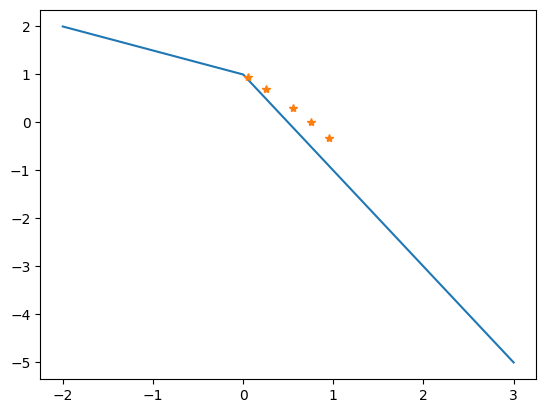

In [ ]:
plt.plot(x,y)
plt.plot(x_values,y_values,'*')